In [1]:
import sys
# remove last element from path
import os
from os.path import abspath, join, exists
sys.path.pop()  # preexisting imports path messing up imports
sys.path.append(abspath(join('..')))  # ,'src'
sys.path.append(abspath(join('../..')))  # ,'src'
# print("Python imports path:", "\n".join(sys.path))

In [2]:
from src.data.dataset import get_loaders, get_loaders_processed
from src.visualization.visualize import plot_many
path_data = '/mnt/sdb1/code/sentinel2/processed'
dataset_kwargs = {'tile_size': None, 'crop_pad_mask': None}  # doesn't matter when using processed data
loader_kwargs = {'batch_size': 1, 'num_workers': 0, 'pin_memory': True}
loader = get_loaders_processed(path_data, splits=['test', 'val'], **dataset_kwargs, **loader_kwargs)
loader['train'] = loader['test']  # TODO: debug, remove

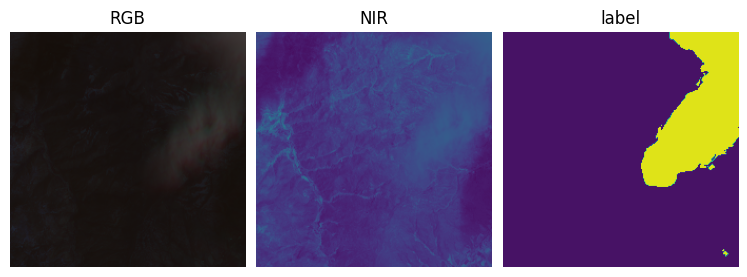

tensor(0.0390) tensor(0.0908) tensor(0.2387)


In [14]:
for i in range(1):
    s = next(iter(loader['train']))
    img, label = s['image'][0], s['label'][0]
    plot_many([img[:3], img[3], label], vmin=0, vmax=1, titles=['RGB', 'NIR', 'label'])
    print(img[:3].min(), img[:3].mean(), img[:3].max())

In [15]:
label.min(), label.mean(), label.max()

(tensor(0.0500), tensor(0.1940), tensor(0.9500))